<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/2_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdution to Neural Network Classification in TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Visualizing our Data

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


from matplotlib import pyplot as plt
_df_0['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X1', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

# Check out the different labels
circles.label.value_counts()


1    500
0    500
Name: label, dtype: int64

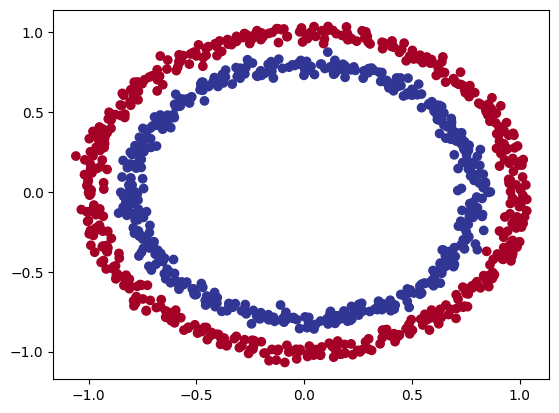

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working on?
len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
* 1. Creating a model
* 2. Compiling the model
* 3. Fitting the model
* 4. Evaluate the model

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model

model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0) # set verbose=0 to make the output print less


# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.693646252155304, 0.5]

## Improving the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5100


[0.6986708045005798, 0.5099999904632568]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


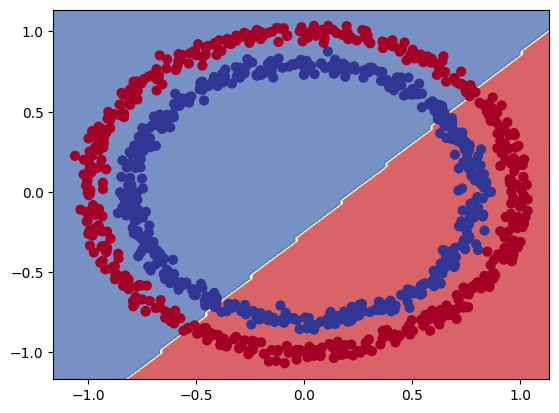

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate some sample regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split the data into train and test sets
X_reg_train = X_regression[:150].reshape(-1, 1)  # Reshape to make it 2D
X_reg_test = X_regression[150:].reshape(-1, 1)
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Import Sequential and Dense from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_3 = Sequential([
    Dense(64, input_shape=(1,), activation='relu'),  # Input shape is 1D
    Dense(1)  # Output layer for regression
])

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)


Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 170626.5625
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 150327.3125
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 132635.5781
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 115773.4531
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 100076.1016
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 85411.2031
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 72445.6641
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 61464.3789
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 51841.8555
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42974.4414
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 35225.9844
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 28561.7441
Epoch 13

In [ ]:
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 502.9006 - mae: 502.9006
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 390.6507 - mae: 390.6507
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 309.0786 - mae: 309.0786
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 263.8547 - mae: 263.8547
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 257.0999 - mae: 257.0999
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 262.6899 - mae: 262.6899
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 260.5232 - mae: 260.5232
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 255.9191 - mae: 255.9191
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 259.5828 - mae: 259.5828
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 256.7302 - mae: 256.7302
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 5ms/step


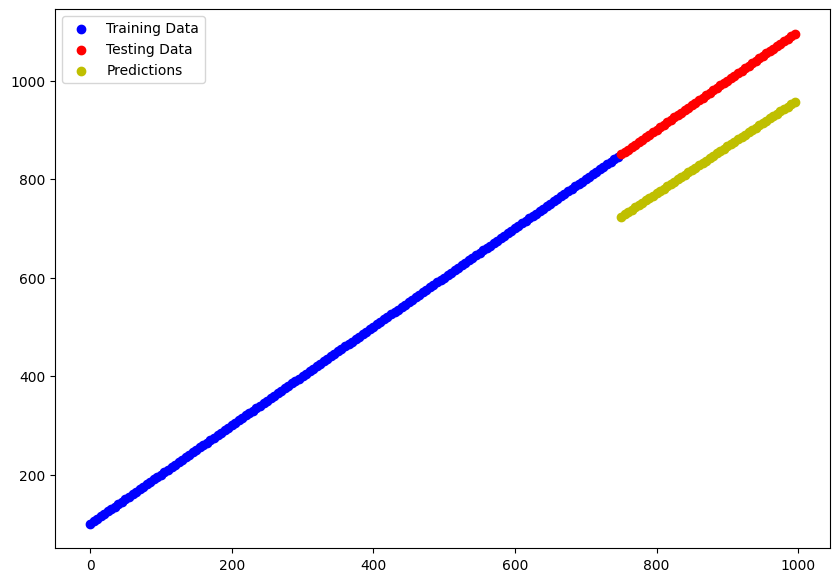

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Testing Data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='y', label='Predictions')
plt.legend();

The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 6.2170 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1639 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1340 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1083 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0887 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0650 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0372 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0299 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0150 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9204 - accuracy: 0.4840
Epoch 11/

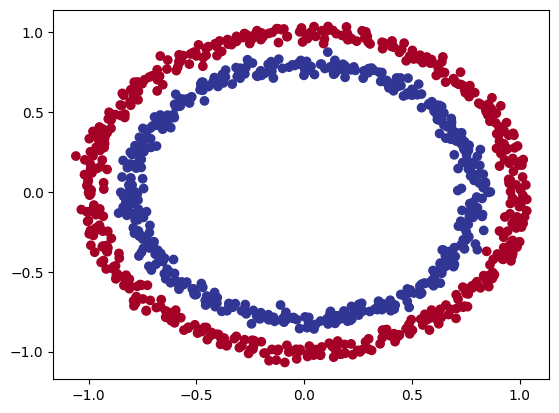

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


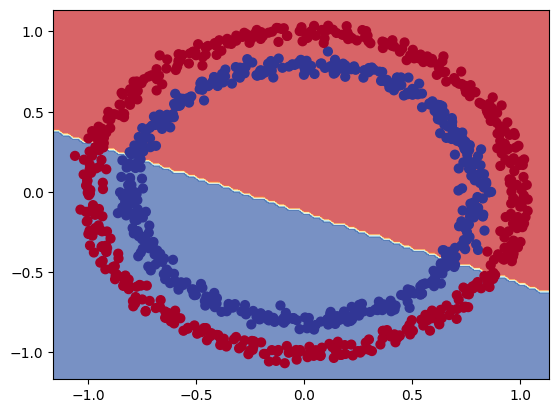

In [ ]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Building the neural network with a non-linear function

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.7309 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6743 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6139 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5851 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5716 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5402 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5084 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4620 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3437 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3054 - accuracy: 0.4820
Epoch 11/

Upgrading our non-linear model with more layers

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.7416 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3968 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1831 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1192 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0609 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9907 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9364 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8723 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8490 - accuracy: 0.4690
Epoch 11/

In [ ]:

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7890


[0.5219501256942749, 0.7889999747276306]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


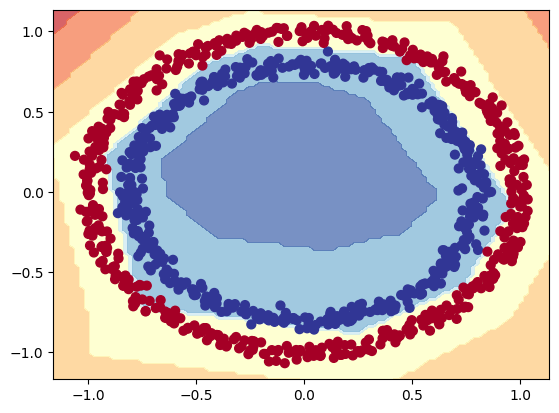

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7250


[0.5770016312599182, 0.7250000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


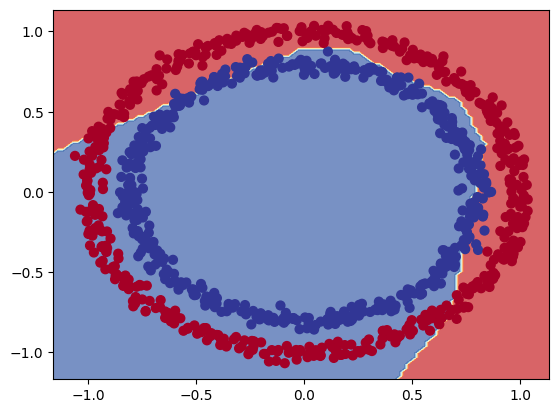

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

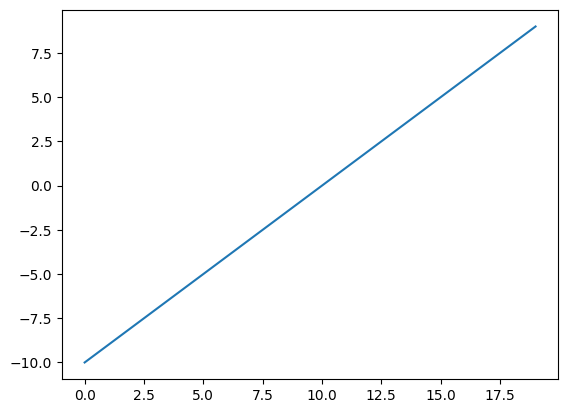

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

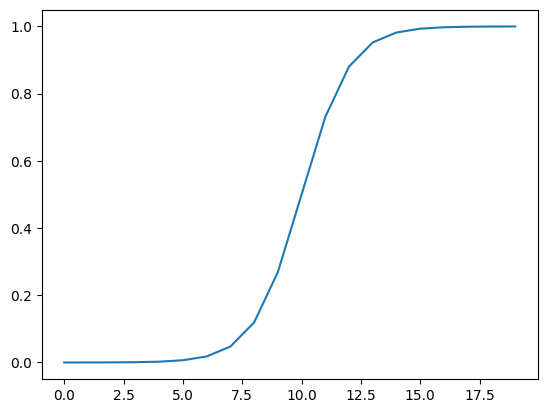

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# ReLU
def relu(x):
  return tf.maximum(0, x)
# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

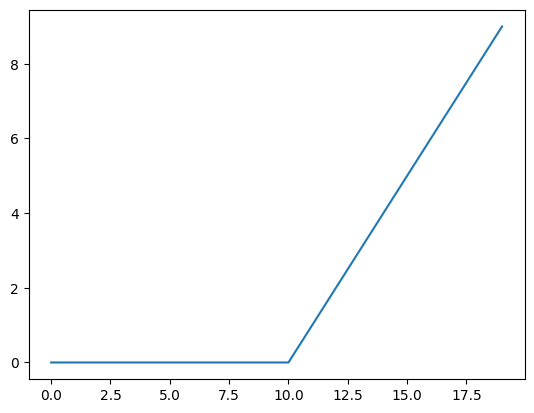

In [ ]:
plt.plot(relu(A))

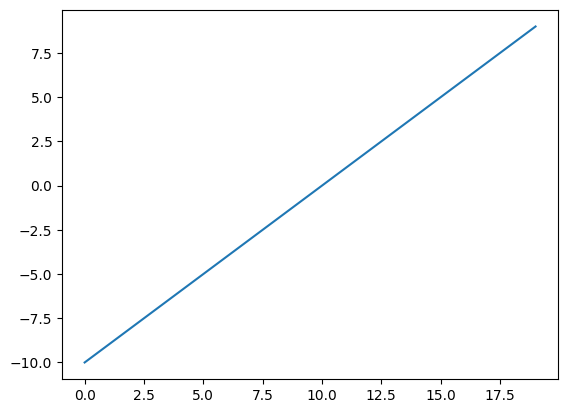

In [ ]:
# Linear
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5175
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5387
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5400
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6000
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6750
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7013
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.7750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.8087
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.8475
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8925
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0865 - accuracy: 0.9900
Model loss on the test set: 0.08649079501628876
Model accuracy on the test set: 99.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation
313/313 [==============================] - 0s 1ms/step
doing binary classifcation


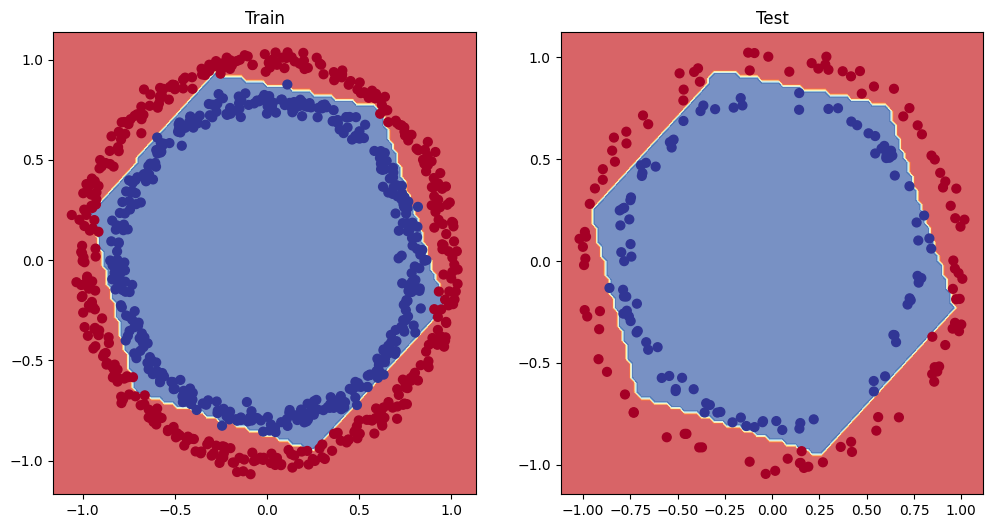

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.701843,0.46750
1,0.694784,0.47000
2,0.692882,0.49875
3,0.691775,0.47750
4,0.690630,0.51625
5,0.689232,0.50500
6,0.678034,0.55750
7,0.662482,0.61750
8,0.637623,0.67000
9,0.603481,0.71125


from matplotlib import pyplot as plt
_df_8['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Model_8 training curves')

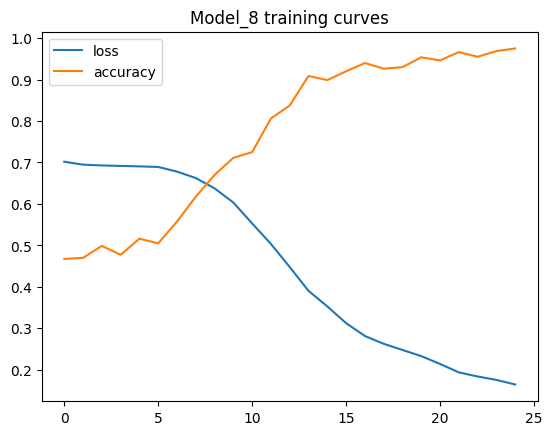

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# FIt the the model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

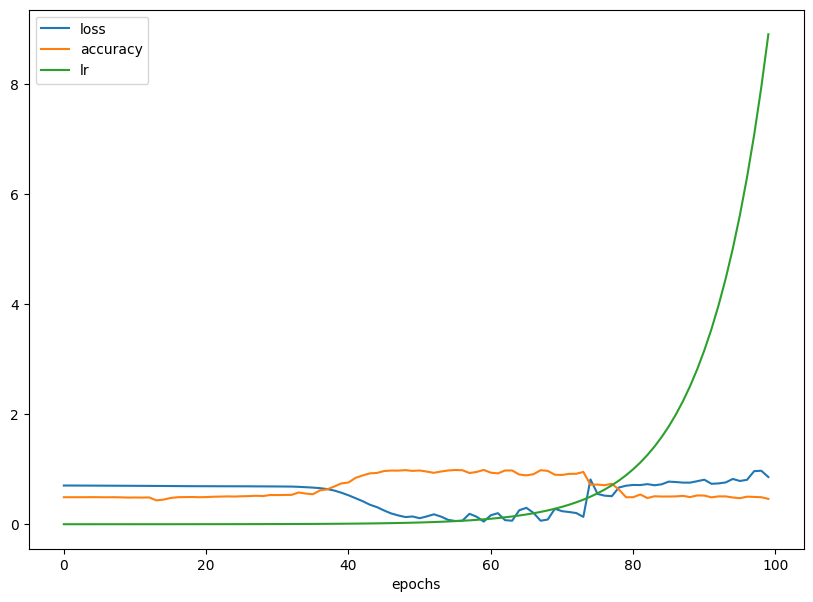

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

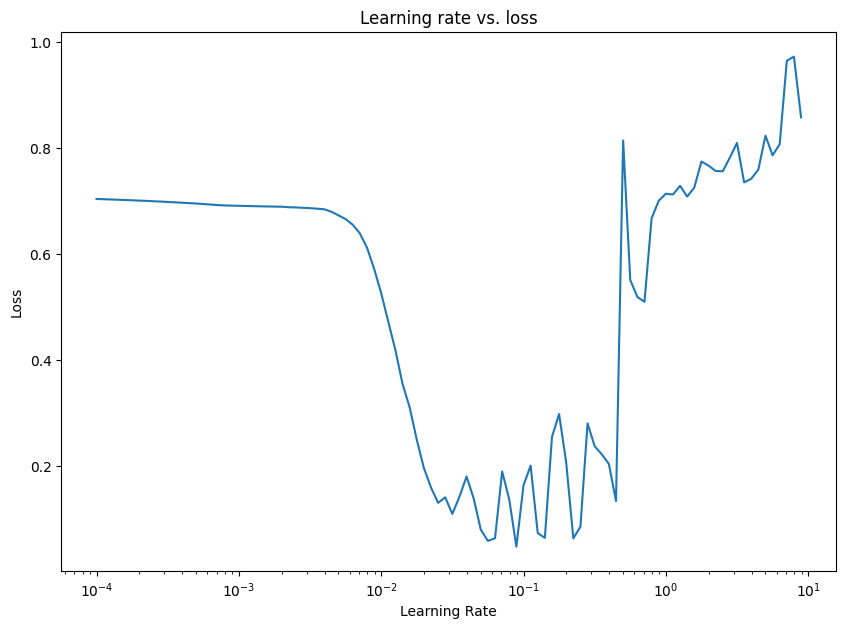

In [ ]:
# plot the lr vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
len(lrs)

100

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5638
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5688
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6112
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.6950
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7875
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4557 - accuracy: 0.8850
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.9375
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.9812
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9912
Epoch 11/20
25/25 [

With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9800


[0.0790305882692337, 0.9800000190734863]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation
313/313 [==============================] - 0s 2ms/step
doing binary classifcation


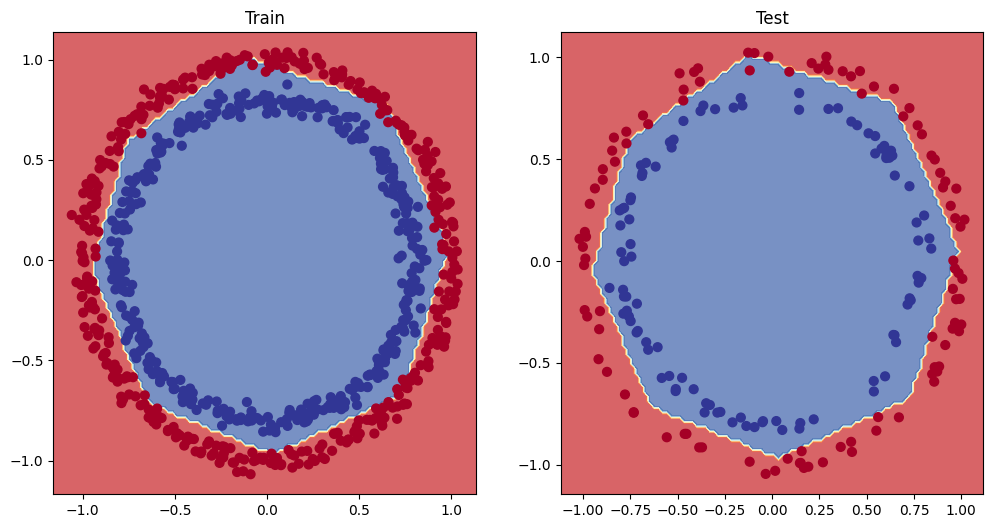

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9800


[0.0790305882692337, 0.9800000190734863]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9900


[0.08649079501628876, 0.9900000095367432]

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9800
Model loss on test set: 0.0790305882692337
Model accuracy on test set: 98.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[97,  4],
       [ 0, 99]])

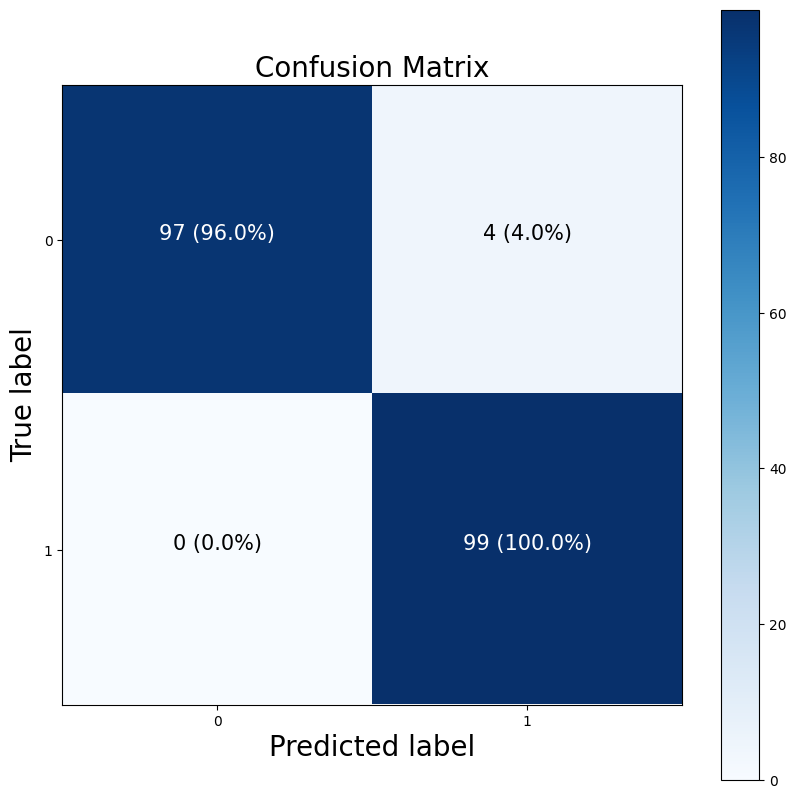

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

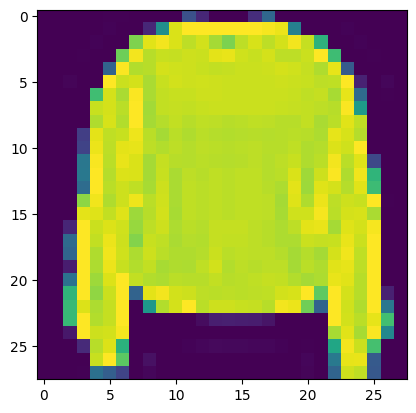

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

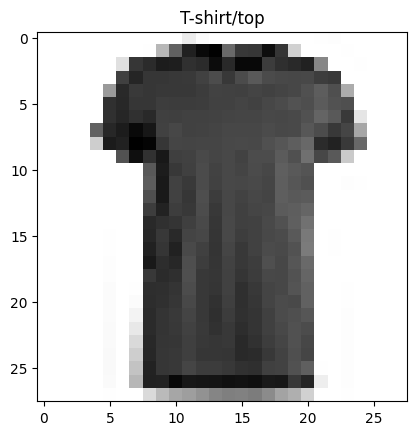

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

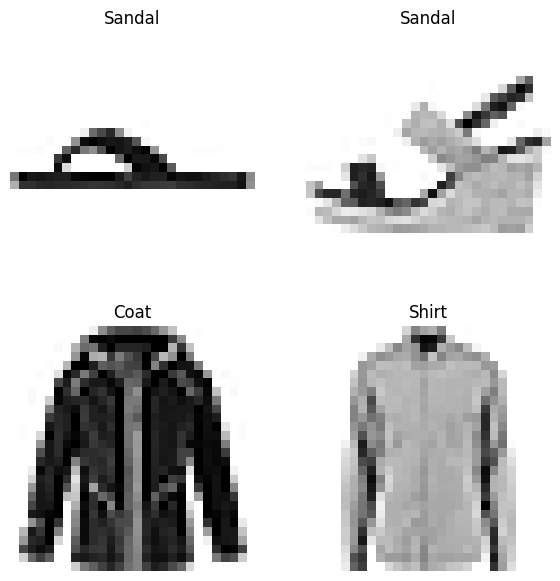

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4716 - accuracy: 0.0991 - val_loss: 2.3019 - val_accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.0992 - val_loss: 2.3011 - val_accuracy: 0.1008
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2941 - accuracy: 0.1055 - val_loss: 2.2829 - val_accuracy: 0.1140
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2358 - accuracy: 0.1328 - val_loss: 2.1930 - val_accuracy: 0.1444
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1697 - accuracy: 0.1550 - val_loss: 2.0849 - val_accuracy: 0.1848
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8663 - accuracy: 0.2186 - val_loss: 1.7868 - val_accuracy: 0.2086
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7149 - accuracy: 0.2658 - val_loss: 1.6727 - val_accuracy:

In [ ]:
# Check the shapes of our model
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min() , train_data.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2313 - accuracy: 0.5816 - val_loss: 0.9221 - val_accuracy: 0.6901
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7987 - accuracy: 0.7287 - val_loss: 0.7381 - val_accuracy: 0.7503
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6715 - accuracy: 0.7663 - val_loss: 0.6784 - val_accuracy: 0.7650
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6190 - accuracy: 0.7797 - val_loss: 0.6486 - val_accuracy: 0.7693
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5951 - accuracy: 0.7827 - val_loss: 0.6140 - val_accuracy: 0.7761
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5800 - accuracy: 0.7860 - val_loss: 0.6340 - val_accuracy: 0.7709
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5700 - accuracy: 0.7886 - val_loss: 0.6022 - val_accuracy

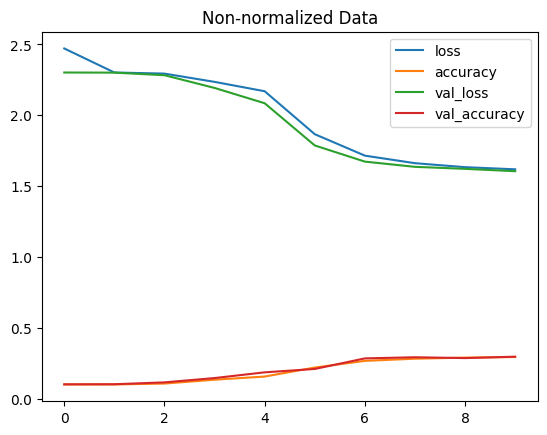

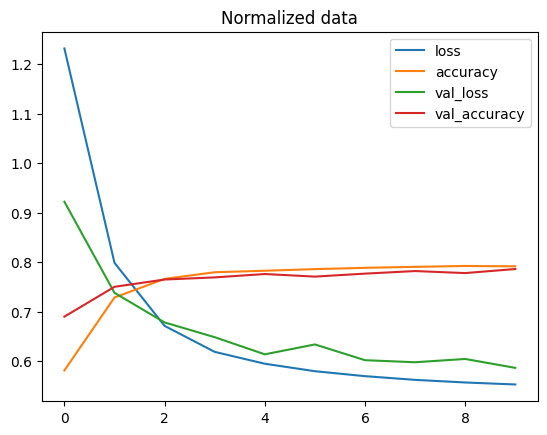

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data, train_labels, epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3980 - accuracy: 0.4475 - val_loss: 1.0572 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9696 - accuracy: 0.5808 - val_loss: 0.9209 - val_accuracy: 0.5974 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8780 - accuracy: 0.6273 - val_loss: 0.8669 - val_accuracy: 0.6353 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8386 - accuracy: 0.6436 - val_loss: 0.8511 - val_accuracy: 0.6350 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8239 - accuracy: 0.6461 - val_loss: 0.8314 - val_accuracy: 0.6442 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8151 - accuracy: 0.6471 - val_loss: 0.8324 - val_accuracy: 0.6387 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

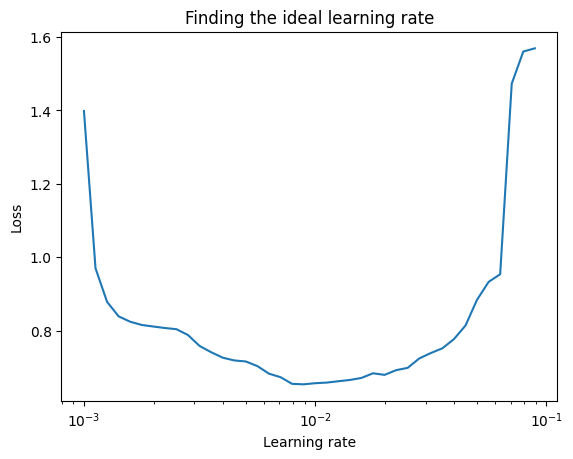

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9580 - accuracy: 0.6650 - val_loss: 0.7059 - val_accuracy: 0.7603
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6412 - accuracy: 0.7843 - val_loss: 0.6338 - val_accuracy: 0.7837
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5930 - accuracy: 0.7981 - val_loss: 0.6231 - val_accuracy: 0.7786
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5706 - accuracy: 0.8038 - val_loss: 0.5945 - val_accuracy: 0.7939
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5564 - accuracy: 0.8059 - val_loss: 0.5913 - val_accuracy: 0.7950
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5449 - accuracy: 0.8098 - val_loss: 0.6035 - val_accuracy: 0.7878
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5380 - accuracy: 0.8127 - val_loss: 0.6028 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
   # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.8135765e-06, 1.1096114e-06, 6.3083497e-14, 9.9806266e-12,
        1.0775460e-08, 1.6867261e-01, 7.1705163e-06, 2.6872852e-01,
        1.0268700e-02, 5.5232012e-01],
       [3.3545546e-04, 5.6012510e-04, 8.2605350e-01, 4.5117481e-06,
        2.4424033e-02, 0.0000000e+00, 1.4862221e-01, 2.3188947e-34,
        7.6017670e-08, 1.0972338e-26],
       [2.2297336e-05, 9.9997520e-01, 3.4574755e-13, 4.5746447e-07,
        1.1068529e-07, 1.0841943e-19, 1.8718446e-06, 6.9862281e-08,
        6.6658255e-11, 1.8026121e-12],
       [1.1145212e-05, 9.9993742e-01, 2.0330673e-11, 4.7292964e-05,
        1.4548807e-06, 1.8303588e-18, 1.2743260e-06, 1.4954011e-06,
        1.1519291e-11, 1.0674848e-13],
       [1.7772466e-01, 1.1864426e-02, 1.4631367e-01, 5.5725563e-02,
        4.5760874e-02, 4.0842901e-10, 5.5538493e-01, 5.2158328e-10,
        7.2258320e-03, 9.0072959e-08]], dtype=float32)

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[763,  16,   8,  86,   3,   1, 114,   0,   8,   1],
       [  1, 940,   8,  40,   3,   0,   7,   0,   1,   0],
       [ 20,   1, 562,  46, 202,   0, 165,   0,   4,   0],
       [ 26,  28,   7, 860,  36,   2,  38,   1,   2,   0],
       [  1,   1,  66,  46, 793,   0,  87,   0,   6,   0],
       [  2,   0,   0,   1,   0, 892,   1,  68,   9,  27],
       [167,   9,  69,  60, 136,   4, 535,   1,  19,   0],
       [  0,   0,   0,   0,   0,  33,   0, 952,   0,  15],
       [  2,   1,   1,   8,   4,  16,  60,   5, 903,   0],
       [  1,   0,   0,   0,   0,  18,   1,  64,   0, 916]])

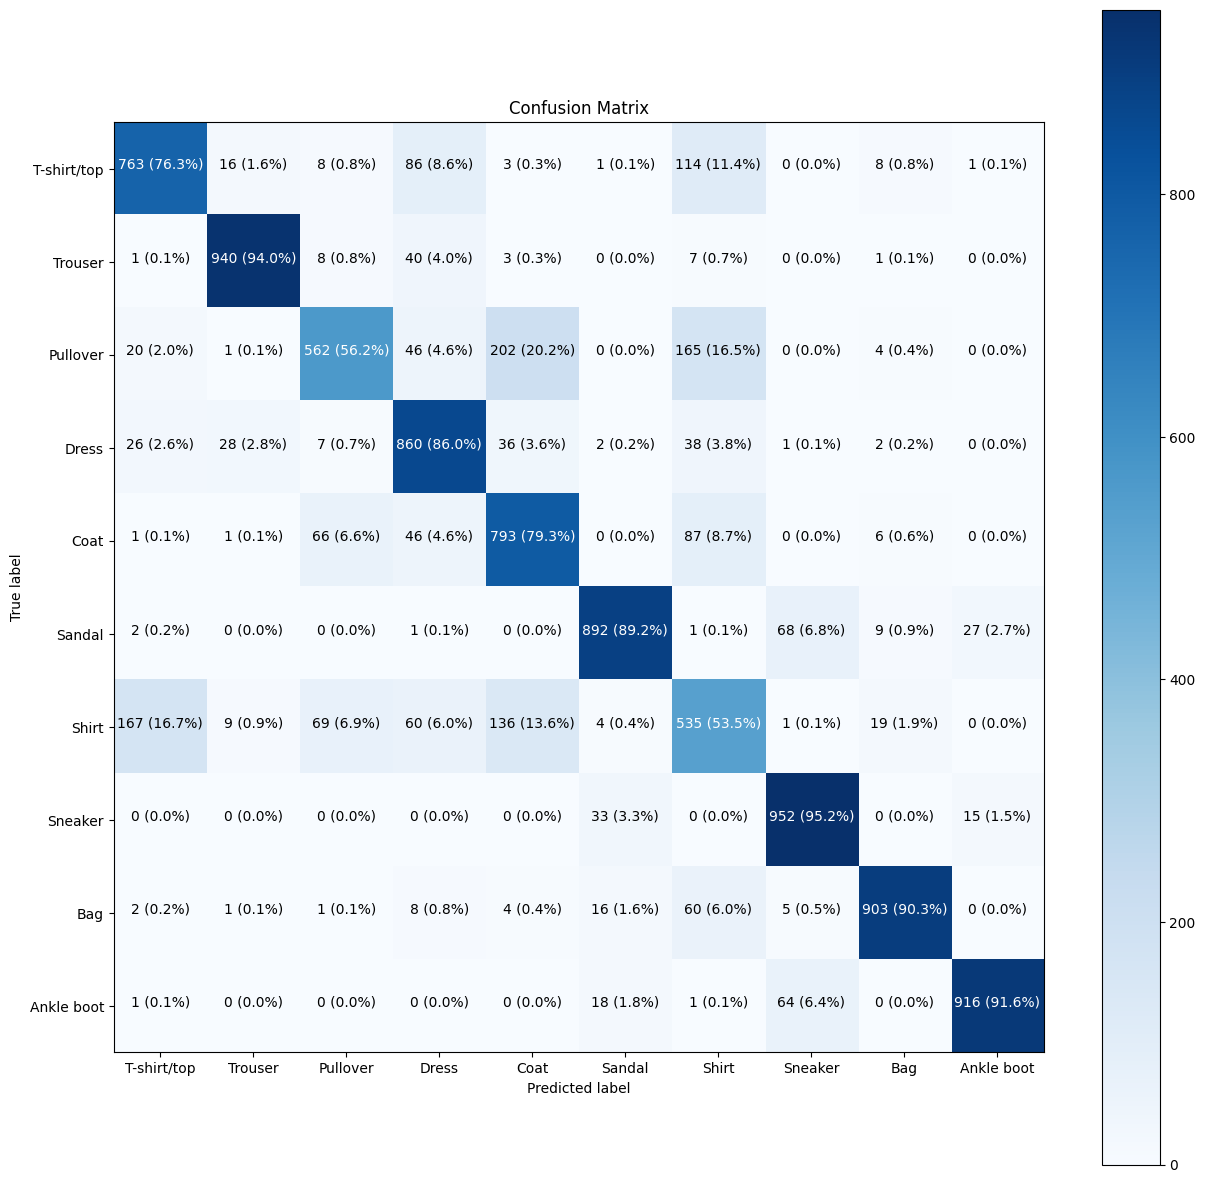

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 33ms/step


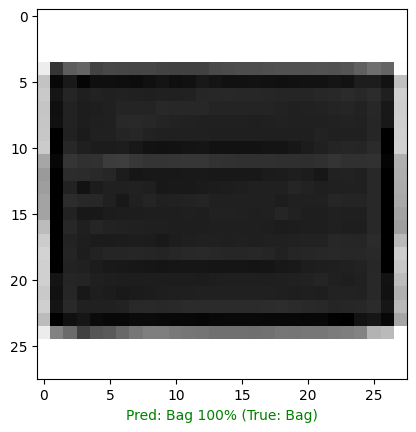

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.21029797,  0.13536663,  0.30675972, -0.5174063 ],
        [-0.01826886, -0.20804739,  1.0853273 , -1.0391141 ],
        [ 0.7610398 , -0.968714  ,  0.5955184 , -0.9429125 ],
        ...,
        [-0.03069404, -0.29448342,  0.2887238 ,  0.18627526],
        [-0.7709614 ,  0.376688  ,  0.21694906,  0.02635218],
        [ 0.08625548, -0.17552568,  0.20355558, -0.31425023]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.51040006, -0.04809611,  0.14918347,  0.9035989 ], dtype=float32),
 (4,))

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 3140      
                                                                 
 dense_51 (Dense)            (None, 4)                 20        
                                                                 
 dense_52 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


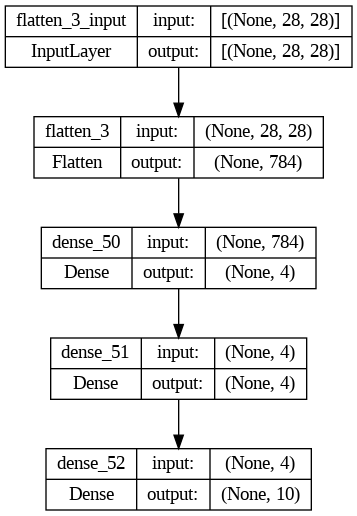

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)